In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

In [3]:
def generuj_zbior(n, seed, k_true, x0_true):
  rng= np.random.default_rng(seed)
  czas= rng.uniform(0, 60, n)
  prawd= 1 / (1+np.exp(-k_true * (czas - x0_true)))
  wynik= rng.binomial(1, prawd)
  return czas, wynik

In [4]:
zbiory= [
    {"n": 100, "seed":1, "k_true": 0.2, "x0_true": 30, "etykieta" : "zbiór 1"},
    {"n": 100, "seed":2, "k_true": 0.15, "x0_true":25, "etykieta" : "zbiór 1"},
    {"n": 100, "seed":3, "k_true": 0.25, "x0_true":35, "etykieta" : "zbiór 1"},
    {"n": 100, "seed":4, "k_true": 0.1, "x0_true": 28, "etykieta" : "zbiór 1"}
]

In [5]:
krzywe=[]

<Figure size 640x480 with 0 Axes>

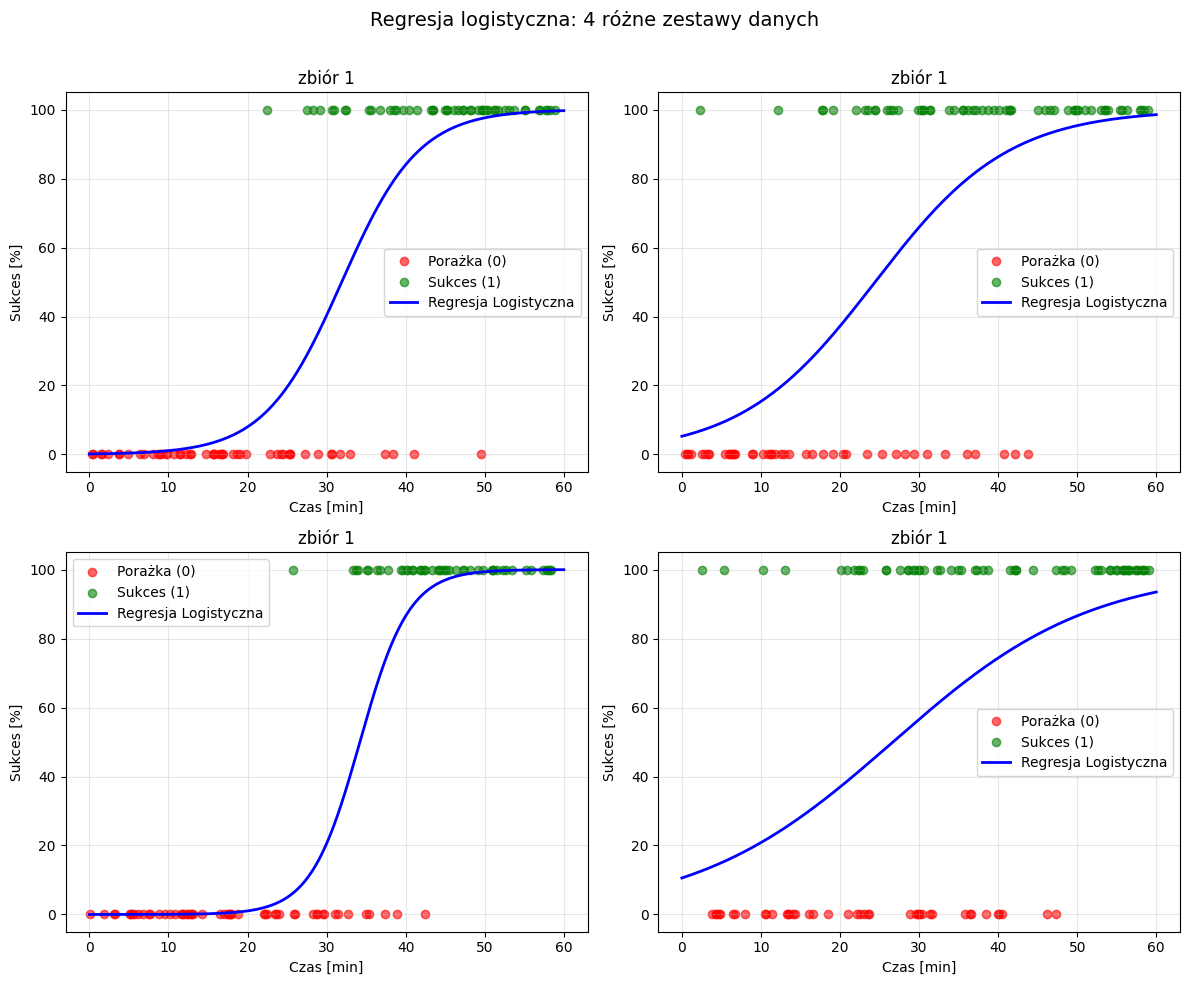

In [6]:
siatka= np.linspace(0,60, 500).reshape(-1,1)

plt.figure()
fig, axs= plt.subplots(2,2, figsize=(12,10))
axs=axs.ravel()

for i, zbior in enumerate(zbiory):
    czas, wynik= generuj_zbior(zbior['n'], zbior['seed'], zbior['k_true'], zbior['x0_true'])
    x= czas.reshape(-1,1)

    model = LogisticRegression()
    model.fit(x, wynik)

    przewidziane= model.predict_proba(siatka)[:, 1] * 100

    axs[i].scatter(czas[wynik==0], wynik[wynik==0] * 100, c='r', alpha=0.6, label='Porażka (0)')
    axs[i].scatter(czas[wynik==1], wynik[wynik==1] * 100, c='g', alpha=0.6, label='Sukces (1)')
    axs[i].plot(siatka, przewidziane, "b-", linewidth=2, label='Regresja Logistyczna')

    axs[i].set_title(zbior['etykieta'])
    axs[i].set_xlabel('Czas [min]')
    axs[i].set_ylabel('Sukces [%]')
    axs[i].grid(True, alpha=0.3)
    axs[i].legend()

plt.suptitle("Regresja logistyczna: 4 różne zestawy danych", fontsize=14)
plt.tight_layout(rect=[0 , 0, 1, 0.97])
plt.show()
